In [3]:
import pandas as pd
import numpy as np

#wczytanie zbiorów danych

df1 = pd.read_csv("wyniki_xgb.csv")
df2 = pd.read_csv("wyniki_regr.csv")
df3 = pd.read_csv("wyniki_knn.csv")

df4 = pd.read_csv("params_regr.csv")
df5 = pd.read_csv("params_knn.csv")
df6 = pd.read_csv("params_xgb.csv")

In [ ]:
#średnie i odchylenia standardowe

In [3]:
df2['tuna_random'].mean()

0.009553333333333334

In [7]:
np.std(df2['tuna_random'], ddof=1) / np.sqrt(15)

0.005230595583557398

In [7]:
df2['tuna_optuna'].mean()

0.011993333333333333

In [9]:
np.std(df2['tuna_optuna'], ddof=1) / np.sqrt(15)

0.005173278104761656

In [11]:
df2['tuna_deafult'].mean()

0.01892

In [11]:
np.std(df2['tuna_deafult'], ddof=1) / np.sqrt(15)

0.015196757799578423

In [13]:
df3['tuna_random'].mean()

0.016193333333333334

In [13]:
np.std(df3['tuna_random'], ddof=1) / np.sqrt(15)

0.006113470424801336

In [15]:
df3['tuna_optuna'].mean()

0.020486666666666667

In [15]:
np.std(df3['tuna_optuna'], ddof=1) / np.sqrt(15)

0.006564876720031103

In [17]:
df3['tuna_deafult'].mean()

0.060146666666666675

In [17]:
np.std(df3['tuna_deafult'], ddof=1) / np.sqrt(15)

0.011872568890661028

In [19]:
df1['tuna_random'].mean()

0.016919999999999998

In [19]:
np.std(df1['tuna_random'], ddof=1) / np.sqrt(15)

0.006945469232322813

In [23]:
df1['tuna_optuna'].mean()

0.024573333333333336

In [21]:
np.std(df1['tuna_optuna'], ddof=1) / np.sqrt(15)

0.008870349038425266

In [27]:
df1['tuna_deafult'].mean()

0.04203333333333334

In [23]:
np.std(df1['tuna_deafult'], ddof=1) / np.sqrt(15)

0.014641863226043286

In [57]:
#1 boxplot
cols = ['tuna_random','tuna_optuna','tuna_deafult']

df2_long = df2[cols].melt(var_name='kolumna', value_name='wartość')
df2_long['alg'] = 'elasticnet'

df3_long = df3[cols].melt(var_name='kolumna', value_name='wartość')
df3_long['alg'] = 'knn'

df1_long = df1[cols].melt(var_name='kolumna', value_name='wartość')
df1_long['alg'] = 'xgboost'

In [59]:
df_all = pd.concat([df2_long, df3_long, df1_long], ignore_index=True)

C:\Users\adik_\AppData\Local\Temp\ipykernel_18896\1940374014.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["RandomSearch", "BayesSearch", "default"])


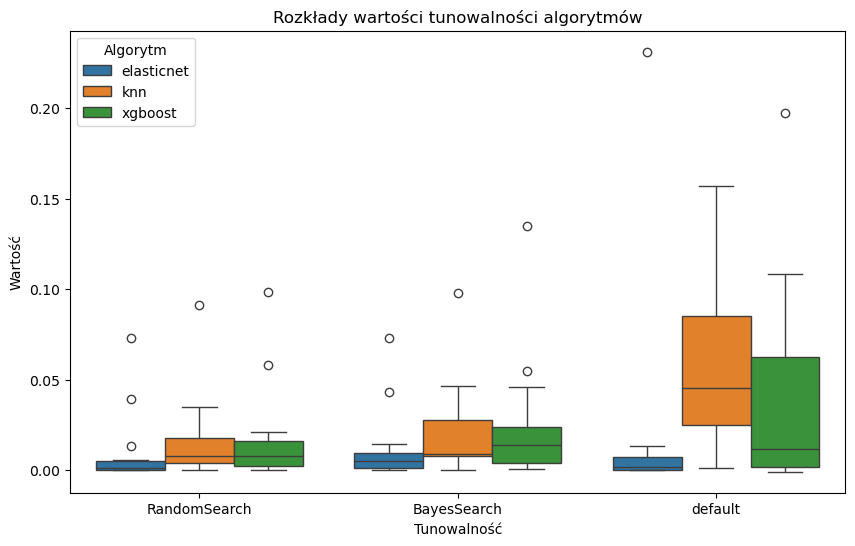

In [67]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df_all,
    x='kolumna',
    y='wartość',
    hue='alg'
)
ax.set_xlabel("Tunowalność")   
ax.set_ylabel("Wartość")
ax.set_xticklabels(["RandomSearch", "BayesSearch", "default"])
ax.legend(title="Algorytm")
plt.title("Rozkłady wartości tunowalności algorytmów")
plt.savefig("nazwa_pliku.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\adik_\AppData\Local\Temp\ipykernel_18896\3794287346.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["C", "l1_ratio"])
C:\Users\adik_\AppData\Local\Temp\ipykernel_18896\3794287346.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["p", "n_neighbors"])


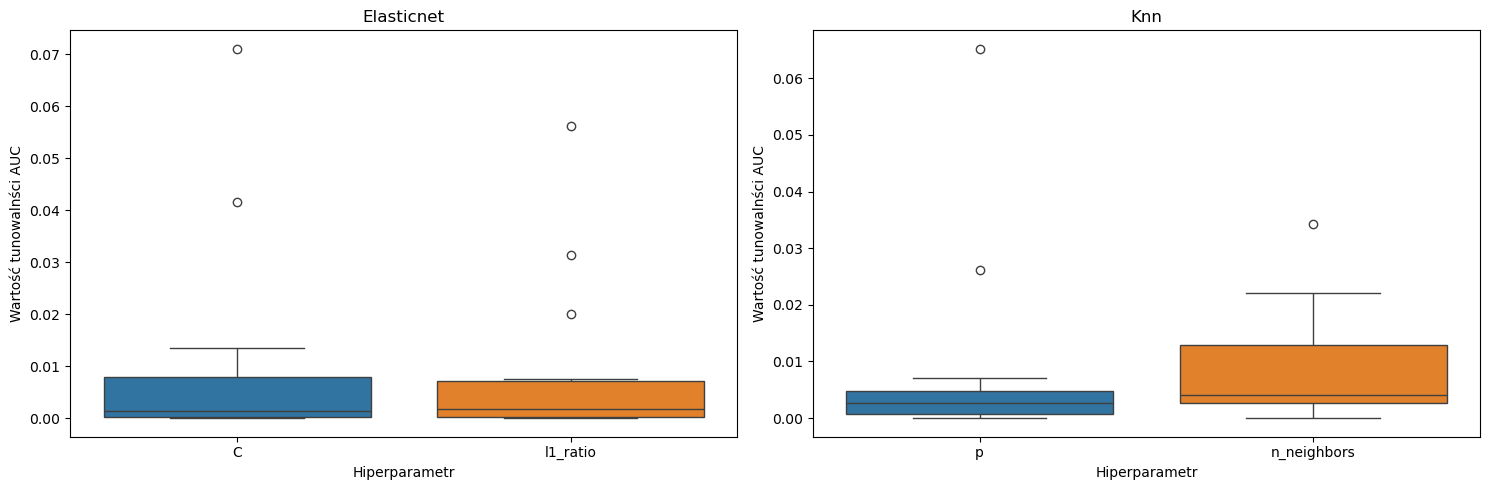

In [79]:
#2 boxplot
cols2 = ['tuna_C','tuna_l1_ratio']
cols3=['tuna_p','tuna_n_neighbors']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df2[cols2], ax=axes[0])
axes[0].set_title("Elasticnet")
axes[0].set_xlabel("Hiperparametr")
axes[0].set_ylabel("Wartość tunowalnści AUC")
axes[0].set_xticklabels(["C", "l1_ratio"])

sns.boxplot(data=df3[cols3], ax=axes[1])
axes[1].set_title("Knn")
axes[1].set_xlabel("Hiperparametr")
axes[1].set_ylabel("Wartość tunowalnści AUC")
axes[1].set_xticklabels(["p", "n_neighbors"])


plt.tight_layout()
plt.savefig("hiper.png", dpi=300, bbox_inches='tight')
plt.show()